# Finding the MRI brain tumour detection dataset

Link to dataset = https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data

## Import Packages

In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import torch.nn as nn
import torch.nn.functional as F

## Reading the images

In [2]:
tumour = []
path = '/home/harvey/Python Projects/Brain Tumour Project/archive/brain_tumor_dataset/yes/*'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    tumour.append(img)

In [3]:
print(len(tumour))

155


In [4]:
for img in tumour:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [5]:
healthy = []
path = '/home/harvey/Python Projects/Brain Tumour Project/archive/brain_tumor_dataset/no/*'
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    healthy.append(img)

In [6]:
print(len(healthy))

98


In [7]:
healthy = np.array(healthy)
tumour = np.array(tumour)

In [8]:
tumour.shape

(155, 128, 128, 3)

In [9]:
healthy.shape

(98, 128, 128, 3)

In [10]:
dataset = np.concatenate((tumour, healthy))

In [11]:
dataset.shape

(253, 128, 128, 3)

## Visualising Brain MRI Images

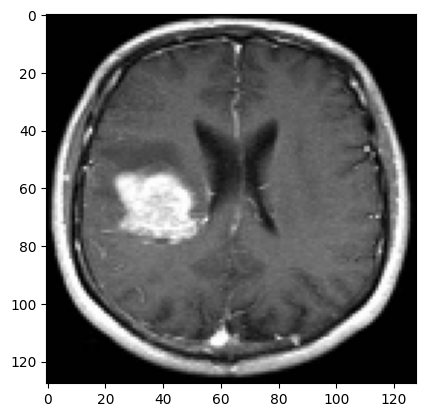

In [12]:
plt.imshow(tumour[3])

In [13]:
def plot_rand(healthy, tumour, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumour_imgs = tumour[np.random.choice(tumour.shape[0], num, replace=False)]

    plt.figure(figsize=(16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i])


    plt.figure(figsize=(16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumour')
        plt.imshow(tumour_imgs[i])

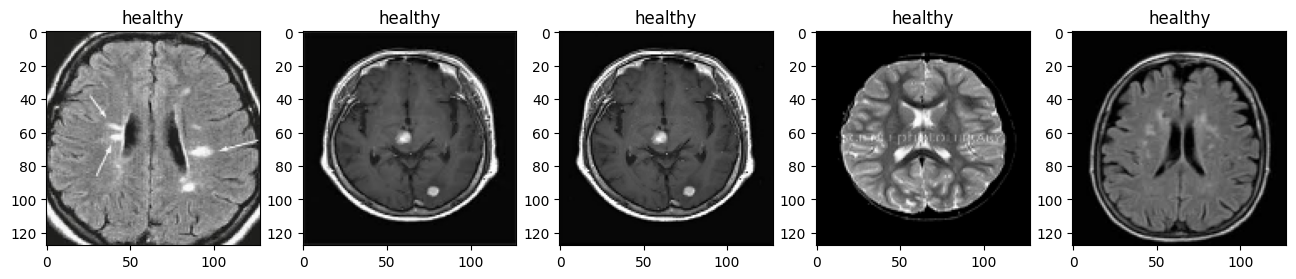

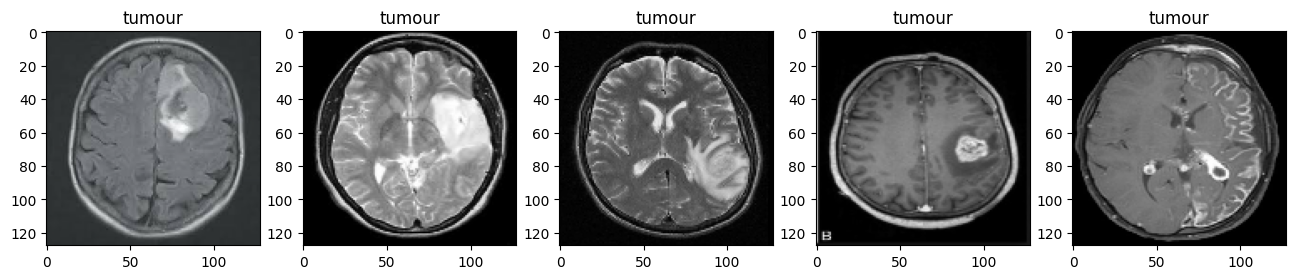

In [14]:
plot_rand(healthy, tumour)

## Create Torch Dataset Class

In [15]:
class MRI (Dataset):
    def __init__(self):



        tumour = []
        path = '/home/harvey/Python Projects/Brain Tumour Project/archive/brain_tumor_dataset/yes/*'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
            tumour.append(img)


        healthy = []
        path = '/home/harvey/Python Projects/Brain Tumour Project/archive/brain_tumor_dataset/no/*'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
            healthy.append(img)

    # Our images
            
        healthy = np.array(healthy, dtype= np.float32)
        tumour = np.array(tumour, dtype= np.float32)

    # Our labels
        tumour_label = np.ones(tumour.shape[0], dtype= np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype= np.float32)


    # Concatenate
        self.images = np.concatenate((tumour, healthy), axis=0)
        self.labels = np.concatenate((tumour_label, healthy_label))
    
    def __len__(self):
        return self.images.shape[0]
    
    def __getitem__(self, index):
        sample = {'image': self.images[index], 'label': self.labels[index]}
        return sample
    
    def normalize(self):
        self.images = self.images/255.0
        

## Creating a dataloader

In [16]:
dataset = MRI()
dataset.normalize()

In [17]:
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

## Create a model

In [18]:
class CNN (nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels=6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride=5),
            nn.Conv2d(in_channels = 6, out_channels=16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size = 2, stride=5)
        ) 

        self.fc_model = nn.Sequential(
            nn.Linear(in_features=256, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=1)

        )
    
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        x = F.sigmoid(x)
        return x

In [19]:
model = CNN()

In [20]:
device = torch.device('cuda:0')
model = model.to(device)

In [21]:
model.eval()
outputs = []
y_true = []
with torch.no_grad():
    for D in dataloader:
        image = D['image'].to(device)
        label = D['label'].to(device)

        y_hat = model(image)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
    

In [22]:
outputs = np.concatenate(outputs, axis=0).squeeze()
y_true = np.concatenate(y_true, axis=0).squeeze()

In [23]:
def threshold(scores, threshold = 0.5, minimum = 0, maximum = 1.0):
    x = np.array(list(scores))
    x[x >= threshold] = maximum
    x[x < threshold] = minimum
    return x


In [24]:
accuracy_score(y_true, threshold(outputs))

0.38735177865612647

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

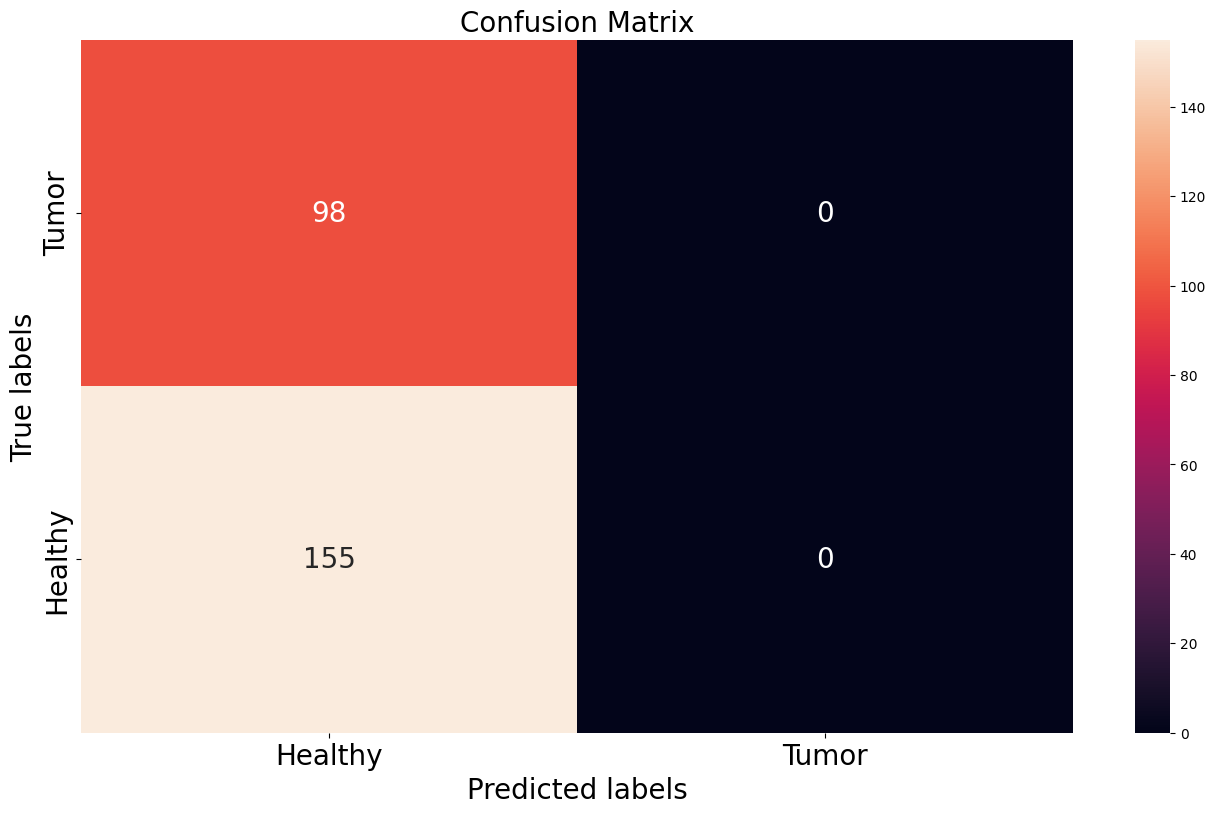

In [25]:
# a better confusion matrix
import seaborn as sns

plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20) 
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Healthy','Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor','Healthy'], fontsize=20)

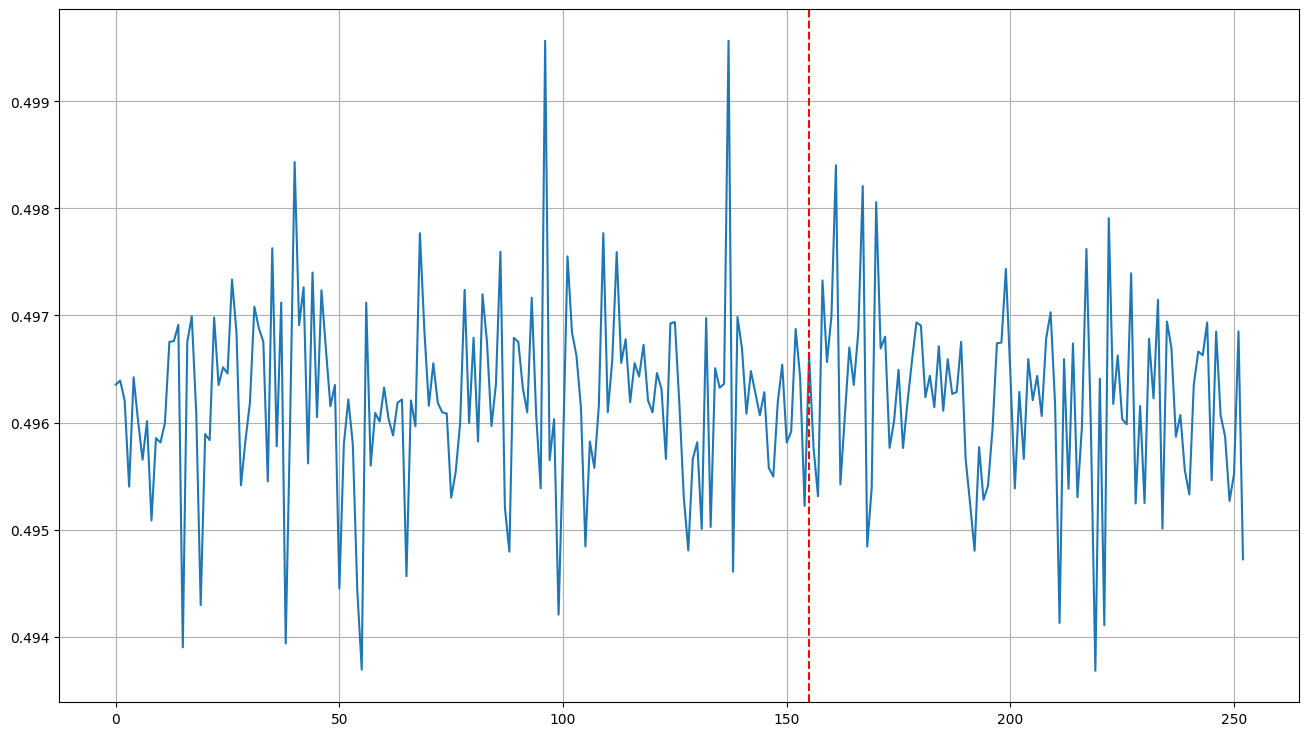

In [26]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumour), color='r', linestyle='--')
plt.grid()

## Train Model

In [27]:
eta = 0.0001
EPOCH = 400
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
dataloader= DataLoader(dataset, batch_size= 32, shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [28]:
for epoch in range(1, EPOCH):
    losses = []
    for d in dataloader:
        optimizer.zero_grad()
        data = d['image'].to(device)
        label = d['label'].to(device)
        y_hat = model(data)

        # Define loss function
        error = nn.BCELoss()
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, np.mean(losses)))


Train Epoch: 10	Loss: 0.640261
Train Epoch: 20	Loss: 0.614173
Train Epoch: 30	Loss: 0.567845
Train Epoch: 40	Loss: 0.525433
Train Epoch: 50	Loss: 0.502649
Train Epoch: 60	Loss: 0.473724
Train Epoch: 70	Loss: 0.455411
Train Epoch: 80	Loss: 0.434407
Train Epoch: 90	Loss: 0.426931
Train Epoch: 100	Loss: 0.403627
Train Epoch: 110	Loss: 0.391383
Train Epoch: 120	Loss: 0.370367
Train Epoch: 130	Loss: 0.357467
Train Epoch: 140	Loss: 0.338163
Train Epoch: 150	Loss: 0.320738
Train Epoch: 160	Loss: 0.294950
Train Epoch: 170	Loss: 0.285412
Train Epoch: 180	Loss: 0.267367
Train Epoch: 190	Loss: 0.248874
Train Epoch: 200	Loss: 0.225542
Train Epoch: 210	Loss: 0.209901
Train Epoch: 220	Loss: 0.185686
Train Epoch: 230	Loss: 0.167656
Train Epoch: 240	Loss: 0.158658
Train Epoch: 250	Loss: 0.130549
Train Epoch: 260	Loss: 0.116119
Train Epoch: 270	Loss: 0.106770
Train Epoch: 280	Loss: 0.091179
Train Epoch: 290	Loss: 0.081735
Train Epoch: 300	Loss: 0.065826
Train Epoch: 310	Loss: 0.055170
Train Epoch: 320	

In [29]:
model.eval()
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
outputs=[]
y_true = []
with torch.no_grad():
    for D in dataloader:
        image =  D['image'].to(device)
        label = D['label'].to(device)
        
        y_hat = model(image)
        
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
        
outputs = np.concatenate( outputs, axis=0 )
y_true = np.concatenate( y_true, axis=0 )

In [30]:
accuracy_score(y_true, threshold(outputs))

1.0

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

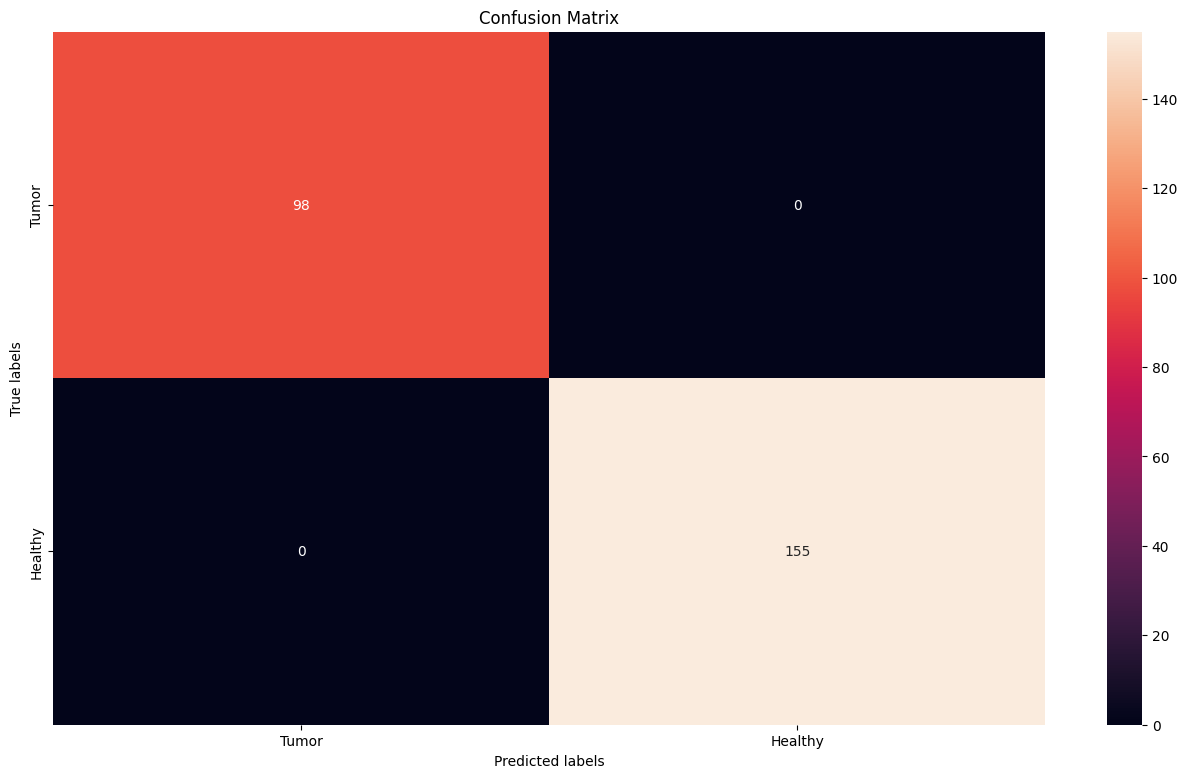

In [31]:
cm = confusion_matrix(y_true, threshold(outputs))
plt.figure(figsize=(16,9))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Tumor','Healthy'])
ax.yaxis.set_ticklabels(['Tumor','Healthy'])

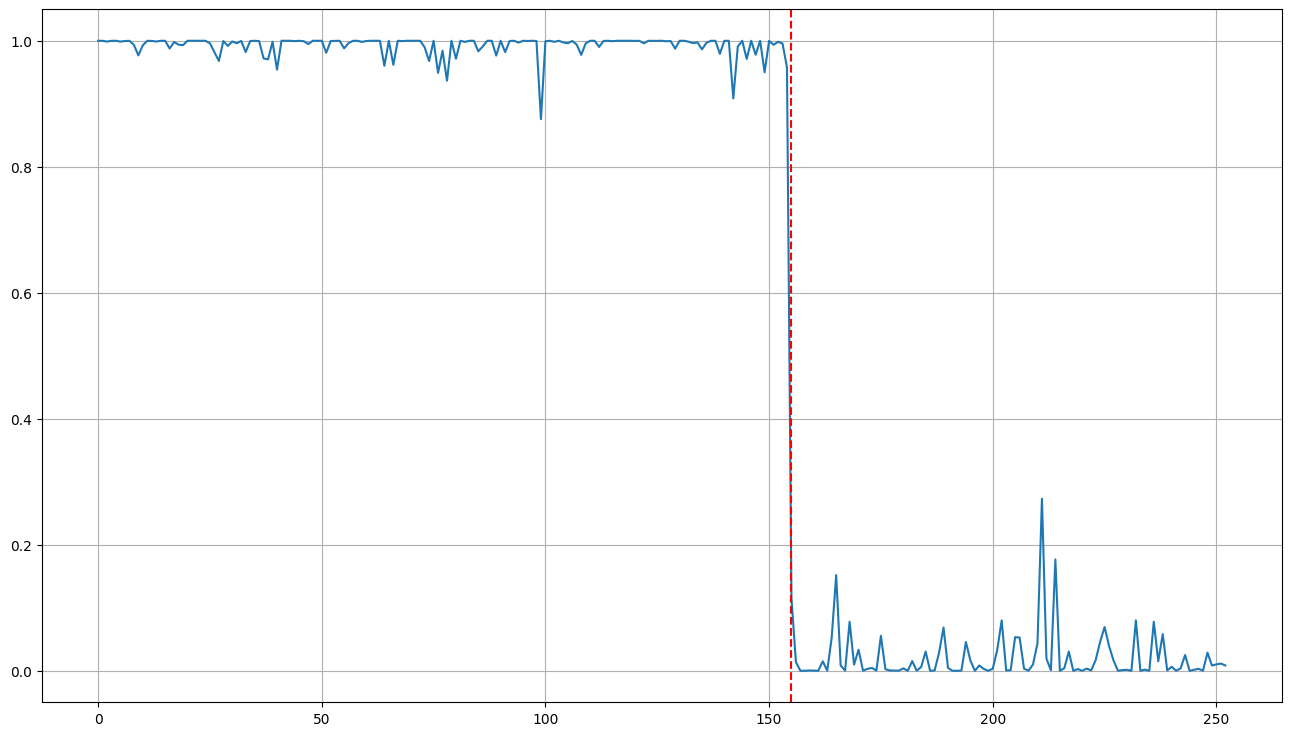

In [32]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumour), color='r', linestyle='--')
plt.grid()

## Visualizing Feature Maps

In [33]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)